# SC2001 Project 2 Dikjstra Algorithm
## SDAB Group 8

## Members:
- Adele Teng
- Nicholas Chang
- Rachel Tan
- Jun Chao

## Table of Contents
1. [Part (a) Dijkstra with Adjacency Matrix and Array as Priority Queue](#a)
2. [Part (b) Dijkstra with Adjacency List and Min Heap as Priority Queue](#b)
3. [Part (c) Compare Algorithms](#c)

In [10]:
import sys
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [11]:
class MinHeap():
 
    def __init__(self):
        self.array = []
        self.size = 0
        self.pos = []
 
    def newMinHeapNode(self, v, dist):
        minHeapNode = [v, dist]
        return minHeapNode
 
    # A utility function to swap two nodes
    # of min heap. Needed for min heapify
    def swapMinHeapNode(self, a, b):
        t = self.array[a]
        self.array[a] = self.array[b]
        self.array[b] = t
 
    # A standard function to heapify at given idx
    # This function also updates position of nodes
    # when they are swapped.Position is needed
    # for decreaseKey()
    def minHeapify(self, idx):
        smallest = idx
        left = 2*idx + 1
        right = 2*idx + 2
 
        if (left < self.size and
           self.array[left][1]
            < self.array[smallest][1]):
            smallest = left
 
        if (right < self.size and
           self.array[right][1]
            < self.array[smallest][1]):
            smallest = right
 
        # The nodes to be swapped in min
        # heap if idx is not smallest
        if smallest != idx:
 
            # Swap positions
            self.pos[self.array[smallest][0]] = idx
            self.pos[self.array[idx][0]] = smallest
 
            # Swap nodes
            self.swapMinHeapNode(smallest, idx)
 
            self.minHeapify(smallest)
 
    # Standard function to extract minimum
    # node from heap
    def extractMin(self):
 
        # Return NULL wif heap is empty
        if self.isEmpty() == True:
            return
 
        # Store the root node
        root = self.array[0]
 
        # Replace root node with last node
        lastNode = self.array[self.size - 1]
        self.array[0] = lastNode
 
        # Update position of last node
        self.pos[lastNode[0]] = 0
        self.pos[root[0]] = self.size - 1
 
        # Reduce heap size and heapify root
        self.size -= 1
        self.minHeapify(0)
 
        return root
 
    def isEmpty(self):
        return True if self.size == 0 else False
 
    def decreaseKey(self, v, dist):
        # Get the index of v in  heap array
        i = self.pos[v]
 
        # Get the node and update its dist value
        self.array[i][1] = dist
 
        # Travel up while the complete tree is
        # not heapified. This is a O(Logn) loop
        while (i > 0 and self.array[i][1] < self.array[(i - 1) // 2][1]):
 
            # Swap this node with its parent
            self.pos[self.array[i][0]] = (i-1)//2
            self.pos[self.array[(i-1)//2][0]] = i
            self.swapMinHeapNode(i, (i - 1)//2 )
 
            # move to parent index
            i = (i - 1) // 2;
 
    # A utility function to check if a given 
    # vertex 'v' is in min heap or not
    def isInMinHeap(self, v):
 
        if self.pos[v] < self.size:
            return True
        return False

## Graph

In [36]:
class Graph():
    def __init__(self, V, density, max_weight=10):
        self.V = V
        self.density = density
        self.max_weight = max_weight
        self.adjMatrix = [[0 for column in range(V)] for row in range(V)]
        self.adjList = [[[row,0]] for row in range(V)]  

    # Generate Adjacency Matrix
    def generate_adjMatrix(self):
        nodes, edges = self.generate_graph()
        n = len(nodes)
        matrix = [[0 for _ in range(n)] for _ in range(n)]

        # Populate the adjacency matrix with values
        for edge in edges:
            start, end, weight = edge
            self.adjMatrix[start][end] = weight
            self.adjMatrix[end][start] = weight

    # Generate Adjacency List
    def generate_adjList(self):
        nodes, edges = self.generate_graph()
        for edge in edges:
            start, end, weight = edge
            self.adjList[start].append([end, weight])
            self.adjList[start].append([end, weight])
            self.adjList[end].append([start, weight])

    def generate_graph(self):
        nodes = list(range(self.V))
        max_edges = self.V * (self.V - 1) // 2
        
        # if self.density == 'dense':
        #     # For dense graphs, we'll use a high number of edges
        #     num_edges = int(0.8 * max_edges)
        # elif self.density == 'average':
        #     # For average graphs, we'll use an average number of edges
        #     num_edges = int(0.5 * max_edges)
        # elif self.density == 'sparse':
        #     # For sparse graphs, we'll use a low number of edges
        #     num_edges = int(0.2 * max_edges)
        
        # Ensure num_edges doesn't exceed the maximum possible edges
        num_edges = int(self.density * max_edges)
        
        # Generate random edges
        edges = set()
        while len(edges) < num_edges:
            # Randomly select 2 nodes
            a, b = random.sample(nodes, 2)
            # Prevent repeated edges
            if a > b:
                a, b = b, a
            w = random.randint(1, self.max_weight)
            edges.add((a, b, w))

        return nodes, list(edges)
        
    # Get the vertex with minimum distance value, from the set of vertices that hasn't been included in the set
    def minDistance(self, dist, S):

        # Initialise minimum distance for next node
        min = sys.maxsize

        # Search for the nearest vertex not in the shortest path tree
        for u in range(self.V):
            if dist[u] < min and S[u] == False:
                min = dist[u]
                min_index = u

        return min_index

    # Implementation of Dijkstra with adjacency matrix representation
    def dijkstraAdjMatrix(self, src):

        # Initialise lists to store distance, predecessors, and visited nodes
        dist = [sys.maxsize] * self.V
        pi = [None] * self.V
        S = [False] * self.V

        # Initialise values based on source node
        dist[src] = 0

        # Iterate through all vertices
        for _ in range(self.V):

            # Get the minimum distance vertex from the set of vertices that has not been selected.
            u = self.minDistance(dist, S)

            # Put the minimum distance vertex in the shortest path tree
            S[u] = True

            # Update distance of the adjacent vertices of the selected vertex only if the current
            # distance is greater than new distance and the vertex in not in the shortest path tree
            for v in range(self.V):
                if self.adjMatrix[u][v] > 0 and S[v] == False and dist[v] > dist[u] + self.adjMatrix[u][v]:
                    dist[v] = dist[u] + self.adjMatrix[u][v]
                    pi[v] = u

    def dijkstraAdjList(self, src):
        
        # Initialise lists to store distance, predecessors, and minheap
        dist = [sys.maxsize] * self.V
        pi = [None] * self.V
        minHeap = MinHeap()
 
        #  Initialize min heap with all vertices. 
        # dist value of all vertices
        for v in range(self.V):
            minHeap.array.append(minHeap.newMinHeapNode(v, dist[v]))
            minHeap.pos.append(v)
 
        # Initialise values based on source node
        minHeap.pos[src] = src
        dist[src] = 0
        minHeap.decreaseKey(src, dist[src])
 
        # Initially size of min heap is equal to V
        minHeap.size = self.V
 
        # Loop until the heap is empty
        while not minHeap.isEmpty():
 
            # Get the vertex with the minimum distance value
            newHeapNode = minHeap.extractMin()
            u = newHeapNode[0]
 
            # Traverse through all adjacent vertices of the extracted vertex and update the distance values
            for i in self.adjList[u]:
                v = i[0]
 
                # If shortest distance to v is not finalized yet, 
                # and distance to v through u is less than its previously calculated distance
                if (minHeap.isInMinHeap(v) and dist[u] != 1e7 and i[1] + dist[u] < dist[v]):
                    dist[v] = i[1] + dist[u]
                    pi[v] = u 
                    
                    # update distance value in min heap
                    minHeap.decreaseKey(v, dist[v])

In [38]:
def dict2df(dict_data):
    dict_restructure = {}
    for (density, size), value in dict_data.items():
        if density not in dict_restructure:
            dict_restructure[density] = {}
        dict_restructure[density][size] = value
    
    # Create DataFrame
    return pd.DataFrame(dict_restructure).T

In [139]:
# Define variables
VERTICES = range(100, 1001, 100)
DENSITY_LVL = np.arange(0.1, 1.1, 0.1)
SELECTED_VERTICES = [200, 500, 800]
SELECTED_EDGES = {
    'Sparse': 0.2,
    'Average': 0.5,
    'Dense': 0.8
}

In [42]:
def eval_adjmatrix():
    dict_eval = {}
    for V in VERTICES:
        for density in DENSITY_LVL:
            # Initialise graph
            graph = Graph(V, density, max_weight=10)
            
            # Generate adjacency matrix
            graph.generate_adjMatrix()
        
            # Get time elapsed
            start_time = time.time()
            graph.dijkstraAdjMatrix(0)
            end_time = time.time()
            duration = end_time - start_time

            # Store duration
            dict_eval[(density, V)] = duration
    return dict_eval

In [44]:
def eval_adjlist():
    dict_eval = {}
    for V in VERTICES:
        for density in DENSITY_LVL:
            # Initialise graph
            graph = Graph(V, density, max_weight=10)
            
            # Generate adjacency matrix
            graph.generate_adjList()
        
            # Get time elapsed
            start_time = time.time()
            graph.dijkstraAdjList(0)
            end_time = time.time()
            duration = end_time - start_time

            # Store duration
            dict_eval[(density, V)] = duration
    return dict_eval

<a id='a'></a>
# Part a: Dijkstra with Adjacency Matrix and Array as Priority Queue

# Analysis of Dijkstra's Algorithm with Adjacency Matrix and Array as Priority Queue

## Algorithm Components:

1. Initialization
2. Main loop
   a. Finding the minimum distance vertex
   b. Updating distances

## Detailed Analysis:

### 1. Initialization:
- We initialize the `dist` and `visited` arrays.
- Time complexity: O(V), where V is the number of vertices.

### 2. Main Loop:
The main loop runs V times, once for each vertex.

#### a. Finding the minimum distance vertex:
- We iterate through all vertices to find the unvisited vertex with the minimum distance.
- Time complexity per iteration: O(V)
- Total time complexity for this step: O(V) * O(V) = O(V²)

#### b. Updating distances:
- For each selected vertex, we check all possible neighbors (all V vertices in an adjacency matrix).
- Time complexity per iteration: O(V)
- Total time complexity for this step: O(V) * O(V) = O(V²)

## Overall Time Complexity:

### Worst Case:
Total time complexity: O(V) + O(V²) = O(V²)

### Average Case:
The average case for Dijkstra's algorithm with an adjacency matrix and array-based priority queue is also O(V²). This is because regardless of the graph's structure, we always perform the same number of operations:
- We always check all V vertices to find the minimum distance vertex.
- We always check all V potential edges for each vertex.

### Best Case:
Even in the best case scenario (e.g., a graph where all vertices are directly connected to the source with no other edges), the time complexity remains O(V²). This is because:
- We still initialize all data structures: O(V)
- We still go through the main loop V times: O(V)
- In each iteration, we still check all V vertices to find the minimum: O(V)
- We still check all potential edges for each vertex: O(V)

So, the best case is also O(V²).

The time complexity of this Dijkstra's algorithm implementation is O(V²) in all cases (worst, average, and best) due to the use of an adjacency matrix and array-based priority queue. 

## Space Complexity:

The space complexity of this implementation can be broken down as follows:

1. Adjacency Matrix: O(V²)
   - The graph is represented as a V x V matrix.

2. Distance Array: O(V)
   - We store a distance value for each vertex.

3. Visited Array: O(V)
   - We keep track of visited status for each vertex.

4. Other Variables: O(1)
   - A constant amount of space for loop variables and temporary storage.

Total Space Complexity: O(V²) + O(V) + O(V) + O(1) = O(V²)
The space complexity is also O(V²), primarily due to the adjacency matrix representation.

The dominant factor is the adjacency matrix, which requires O(V²) space regardless of the number of edges in the graph. This makes the implementation memory-intensive for large graphs, especially sparse ones.


In [47]:
dict_adjMatrix = eval_adjmatrix()
df_adjMatrix = dict2df(dict_adjMatrix)
df_adjMatrix

,100,200,300,400,500,600,700,800,900,1000
0.1,0.001443,0.001795,0.003226,0.005836,0.009231,0.013548,0.018403,0.023951,0.031966,0.038213
0.2,0.001893,0.001782,0.003426,0.006286,0.009843,0.014185,0.019302,0.025377,0.032062,0.039946
0.3,0.001307,0.001697,0.003676,0.006606,0.010311,0.015136,0.020864,0.028013,0.035737,0.044181
0.4,0.001081,0.001700,0.003835,0.006965,0.011307,0.016564,0.022657,0.029728,0.037043,0.045919
0.5,0.001154,0.001835,0.004118,0.007578,0.011916,0.017355,0.023769,0.030339,0.038336,0.047370
0.6,0.000861,0.001870,0.004367,0.007868,0.012400,0.017863,0.024341,0.031324,0.039511,0.048238
0.7,0.000908,0.001994,0.004474,0.008145,0.012833,0.017842,0.024637,0.031762,0.039960,0.049328
0.8,0.000824,0.002023,0.004488,0.008084,0.012444,0.017897,0.024411,0.031943,0.040235,0.049378
0.9,0.000759,0.002027,0.004538,0.008115,0.012639,0.017999,0.024438,0.031733,0.040316,0.049575
1.0,0.000718,0.002014,0.004440,0.008027,0.012438,0.017877,0.024427,0.032218,0.041049,0.049737


In [177]:
def plot_cpu(df):
    plt.figure(figsize=(8, 6))
    for (dense_label, density) in SELECTED_EDGES.items():
        plt.plot(df.loc[density], label=f'{dense_label} (density={density} of max edges)')
    plt.xlabel('Number of Vertices', size=14)
    plt.ylabel('CPU Time (s)', size=14)
    plt.title('CPU Time over Number of Vertices', weight='bold', size=16)
    plt.legend(prop={'size':12})
    plt.show()

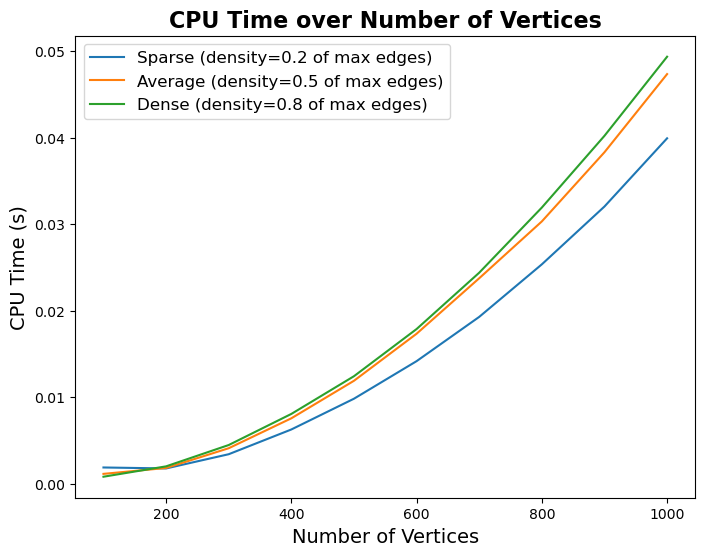

In [179]:
plot_cpu(df_adjMatrix)

<a id='b'></a>

# Part b: Dijkstra with Adjacency List and Min Heap as Priority Queue

# Analysis of Dijkstra's Algorithm with Adjacency List and Min Heap as Priority Queue

## Algorithm Components:

1. Initialization
2. Main loop
    a. Extracting the minimum distance vertex
    b. Updating distances

## Detailed Analysis:
### 1. Initialization:
- We initialize the dist array, create a min heap, and prepare the adjacency list.
- Time complexity: O(V), where V is the number of vertices.

### 2. Main Loop:
The main loop runs until the priority queue (min heap) is empty.

### a. Extracting the minimum distance vertex:
- We extract the minimum element from the min heap.
- Time complexity per extraction: O(log V)
- Total time complexity for this step: O(V log V), as we perform this operation at most V times.

#### b. Updating distances:
- For each selected vertex, we only check its adjacent vertices in the adjacency list.
- For each edge, we may perform a decrease-key operation on the min heap.
- Time complexity per edge: O(log V) for the decrease-key operation
- Total time complexity for this step: O(E log V), where E is the number of edges

## Overall Time Complexity:
### Worst Case:
Total time complexity: O(V) + O(V log V) + O(E log V) = O((V + E) log V)
In a dense graph where E ≈ V(V - 1), this becomes O(E log V).

### Average Case:
The average case for Dijkstra's algorithm with an adjacency list and min heap priority queue is also O((V + E) log V). This is because:

- We perform V extract-min operations: O(V log V)
- We perform at most E decrease-key operations: O(E log V)

### Best Case:
In the best case scenario (e.g., a graph where all vertices are directly connected to the source with no other edges), the time complexity is O(V log V). This is because:

- We still initialize all data structures: O(V)
- We still perform V extract-min operations: O(V log V)
- We perform V-1 decrease-key operations: O(V log V)

So, the best case is O(V log V).


The time complexity of this Dijkstra's algorithm implementation ranges from O(V log V) in the best case to O(V² log V) in the worst case for dense graphs.
## Space Complexity:
The space complexity of this implementation can be broken down as follows:

1. Adjacency List: O(V + E)

    - We store a list of edges for each vertex.


2. Distance Array: O(V)
    - We store a distance value for each vertex.


3. Min Heap (Priority Queue): O(V)

    - In the worst case, all vertices might be in the heap.


4. Other Variables: O(1)
    - A constant amount of space for loop variables and temporary storage.

Total Space Complexity: O(V + E) + O(V) + O(V) + O(1) = O(V + E)
The space complexity is O(V + E), which is more efficient than the adjacency matrix representation, especially for sparse graphs.

This implementation is generally more memory-efficient, particularly for sparse graphs where E << V². It allows the algorithm to handle larger graphs with less memory compared to the adjacency matrix implementation.



In [57]:
dict_adjList = eval_adjlist()
df_adjList = dict2df(dict_adjList)
df_adjList

,100,200,300,400,500,600,700,800,900,1000
0.1,0.001714,0.000878,0.001368,0.002202,0.003388,0.004542,0.006506,0.008261,0.009909,0.012541
0.2,0.001024,0.001014,0.002157,0.003850,0.005885,0.008599,0.011680,0.015882,0.020226,0.025066
0.3,0.001585,0.001437,0.003103,0.005642,0.008935,0.012572,0.017580,0.023405,0.030479,0.038335
0.4,0.000906,0.001640,0.004001,0.007022,0.011901,0.016594,0.024341,0.033038,0.039649,0.050063
0.5,0.001078,0.001981,0.005381,0.009034,0.014682,0.020893,0.029315,0.038459,0.048096,0.062351
0.6,0.001086,0.002633,0.006462,0.010584,0.018881,0.024880,0.034801,0.046602,0.058833,0.076794
0.7,0.000820,0.003006,0.006834,0.012778,0.022335,0.028774,0.040535,0.054164,0.071225,0.092781
0.8,0.000908,0.003584,0.007956,0.014483,0.023071,0.032943,0.045857,0.063138,0.086866,0.111188
0.9,0.000985,0.003866,0.009482,0.016514,0.025301,0.037087,0.051990,0.075646,0.126630,0.126685
1.0,0.000971,0.004065,0.010489,0.018176,0.030342,0.041065,0.060142,0.081686,0.111351,0.146061


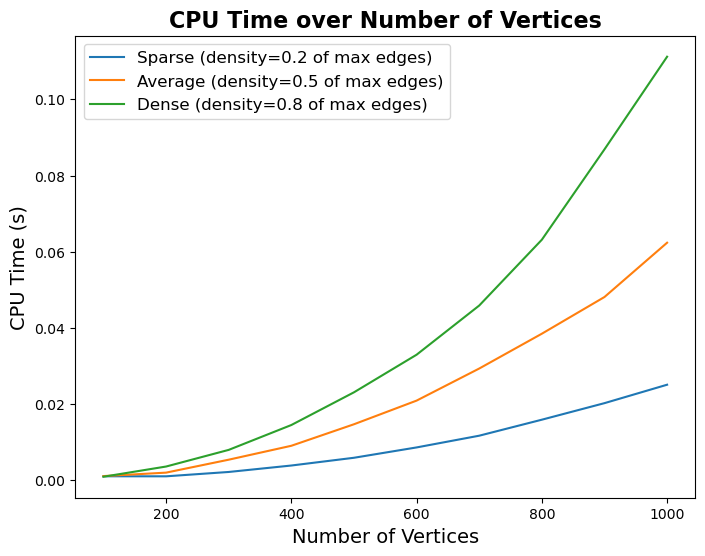

In [181]:
plot_cpu(df_adjList)

<a id='c'></a>
# Part c: Compare Algorithms

In [189]:
def compare_algo_vertice(df_matrix, df_list):
    fig, axes = plt.subplots(3, 1, figsize=(16, 16))
    for vert, ax in zip(SELECTED_VERTICES, axes.flatten()):   
        ax.plot(df_matrix[vert], '-o', label='Adjacency Matrix', color='green')
        ax.plot(df_list[vert], '-o', label='Adjacency List', color='red')
        ax.set_title(f'{vert} Vertices', size=18, fontweight='bold')
        ax.set_xlabel('Edge Density', size=16)
        ax.set_ylabel('CPU Time (s)', size=16)
        ax.set_xticks(DENSITY_LVL)
        ax.legend(prop={'size': 12})
    fig.suptitle('Algorithm Efficiency based on Varying Vertices', size=20, fontweight='bold')
    plt.tight_layout(pad=2.0)
    plt.show()

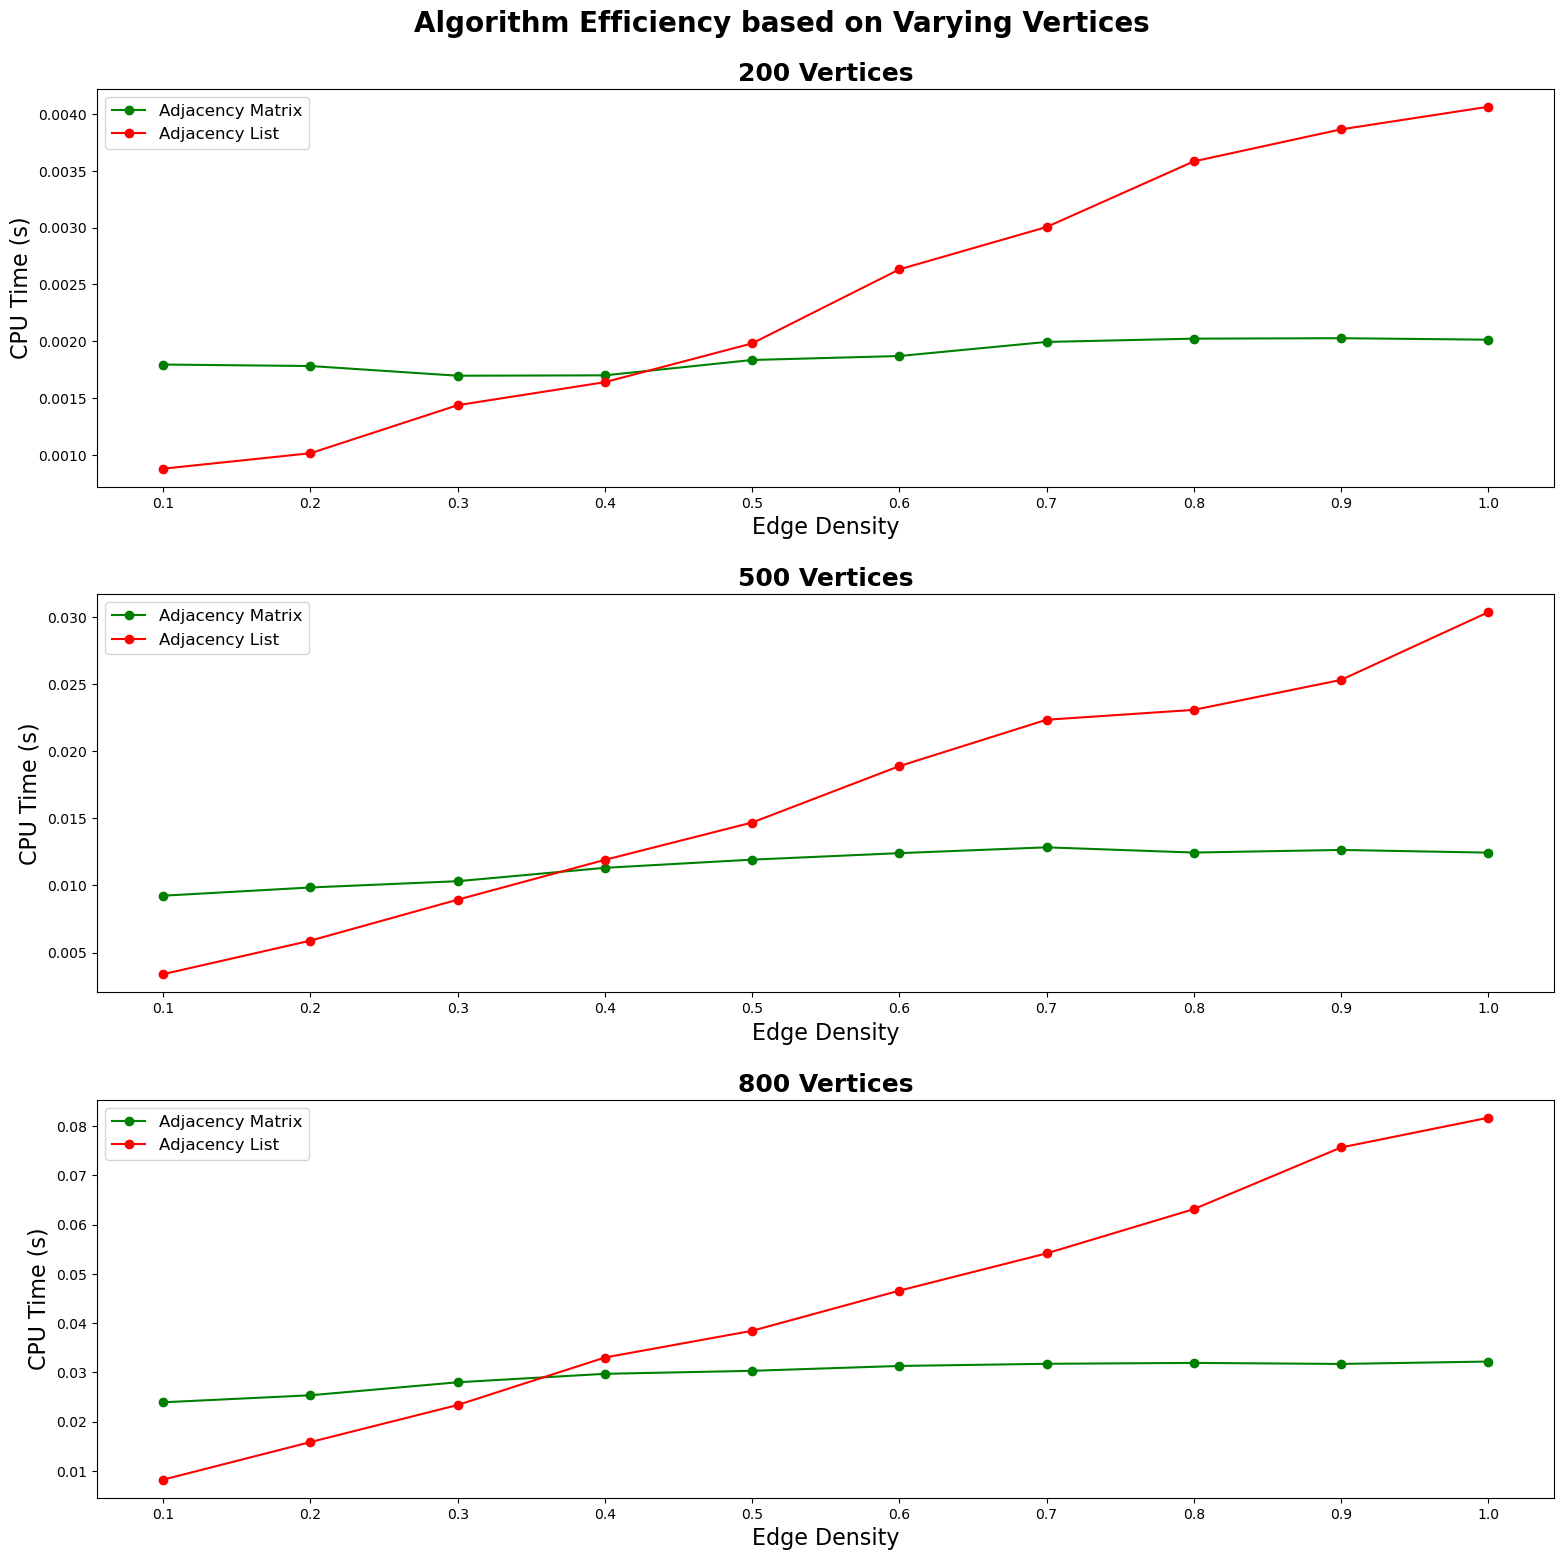

In [191]:
compare_algo_vertice(df_adjMatrix, df_adjList)

In [193]:
def compare_algo_edge_density(df_matrix, df_list):
    fig, axes = plt.subplots(3, 1, figsize=(16, 16))
    for (dense_label, density), ax in zip(SELECTED_EDGES.items(), axes.flatten()):   
        ax.plot(df_matrix.loc[density], '-o', label='Adjacency Matrix')
        ax.plot(df_list.loc[density], '-o', label='Adjacency List')
        ax.set_title(f'{dense_label}', size=18, fontweight='bold')
        ax.set_xlabel('No. of Vertices', size=16)
        ax.set_ylabel('CPU Time (s)', size=16)
        ax.legend(prop={'size': 12})
    fig.suptitle('Algorithm Efficiency based on Varying Edge Density', size=20, fontweight='bold')
    plt.tight_layout(pad=2.0)
    plt.show()

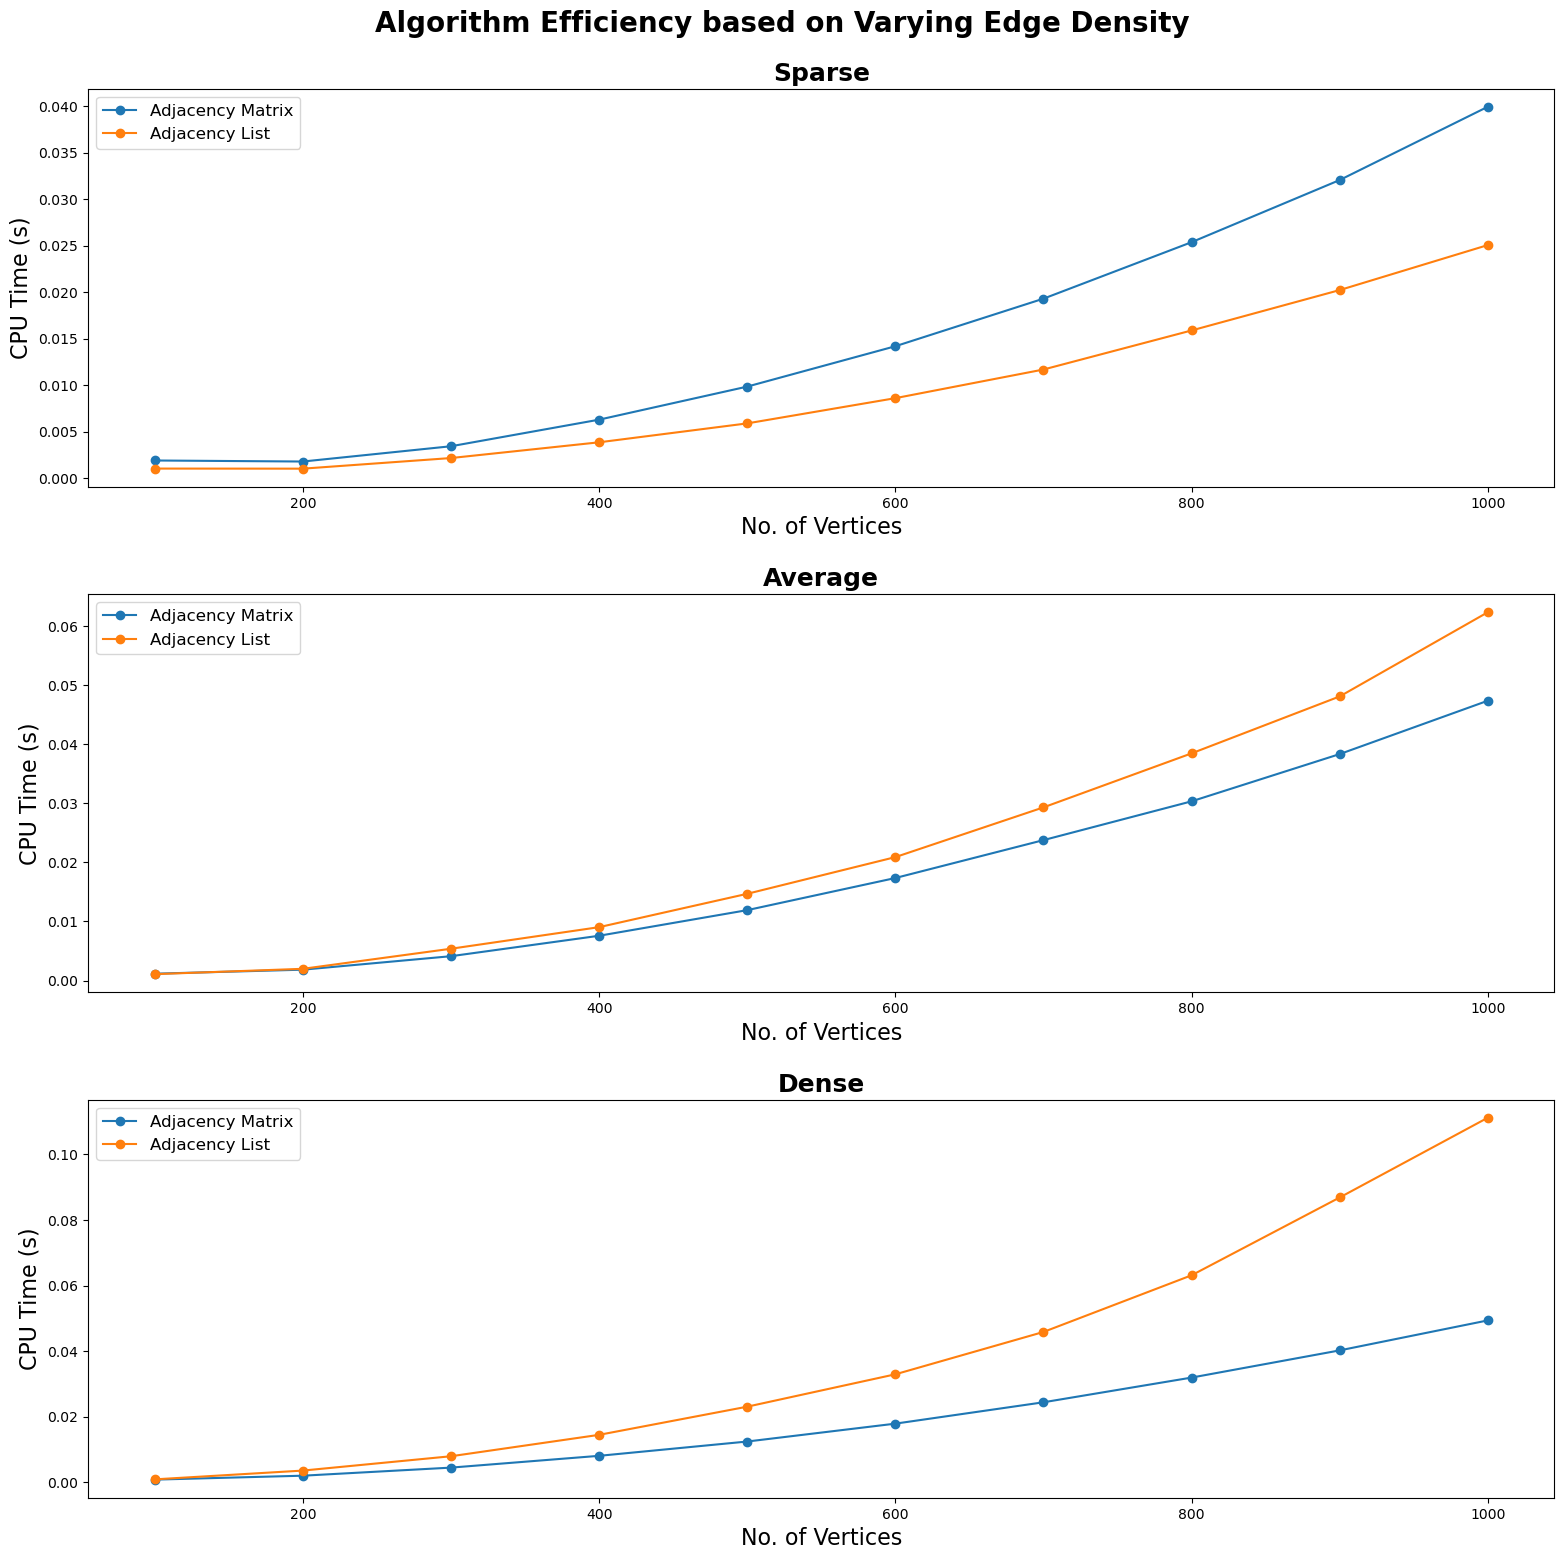

In [195]:
compare_algo_edge_density(df_adjMatrix, df_adjList)

# Conclusion:
1. Efficiency of Algorithm: When is an algorithm more efficient based on E and V values.

Since $|V| \leq |E| \leq |V||V - 1|$

When $|E| \leq \frac{|V|^2}{\log|V|}$ adjacency list would be faster

When $|E| > \frac{|V|^2}{\log|V|}$ adjacency matrix would be faster

2. Efficiency of Algorithm based on Sparsity of Graph

Adjacency list using a min heap is more efficient for sparse graph as it occupies less space compared to a matrix filled mostly with 0's and also takes a faster time to iterate over the edges in the adjacency list.

However, for average or denser graphs, an adjacency matrix using an array would be more practical to use a matrix when there are many edges since it will use less storage as compared to a adjacency list and hence, is more time efficient for search operations.